In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline

#### `matplotlib.pyplot` is the plotting library underlying `pandas` plots and `geopandas` plots

In [2]:
school_districts = gpd.read_file('../data/school_districts.geojson')
school_districts.head(2)

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."


### First plot the school districts with no polishing

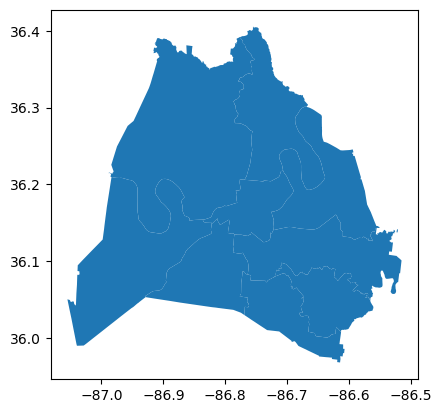

In [3]:
school_districts.plot();

### Next color the polygons according to the `district`
 - set the column argument = to a column in the dataset you want to color by (here we choose `district`)

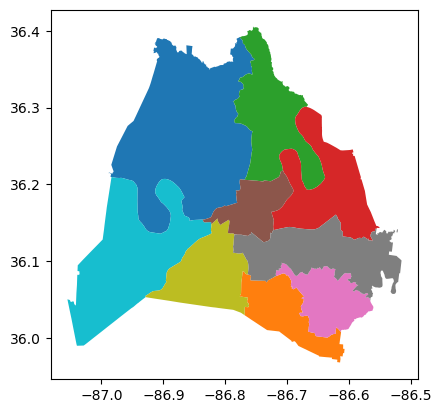

In [4]:
school_districts.plot(column = 'district');

### You can make the colors a bit calmer 
 - to define distinct regions (which are categorical) you want a [qualitative colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

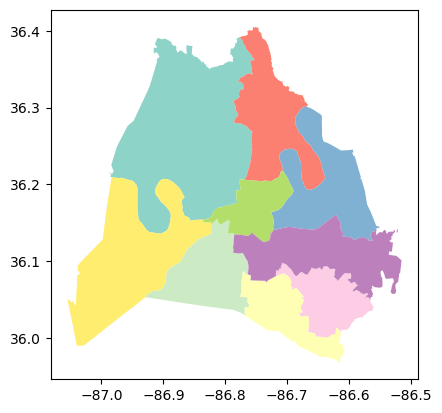

In [5]:
school_districts.plot(column = 'district', cmap = 'Set3');

### To set `figsize()` you can add that argument to your call to `.plot()`

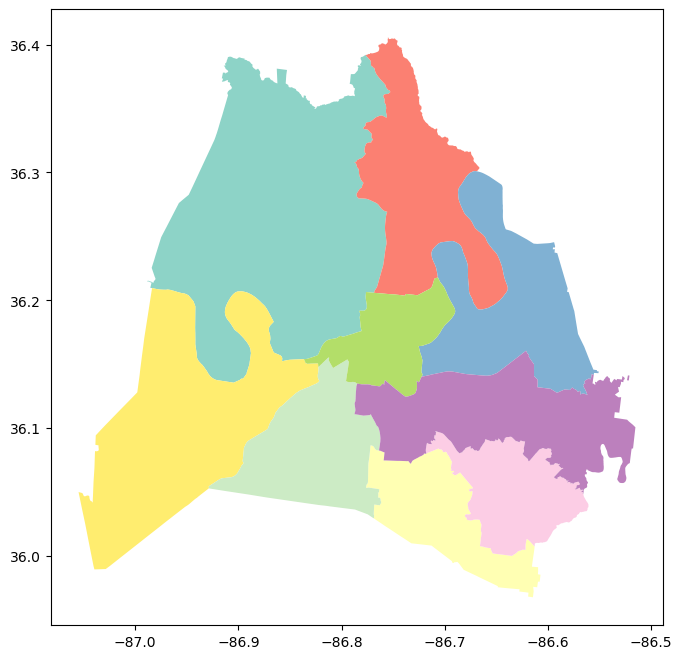

In [6]:
school_districts.plot(column = 'district', cmap = 'Set3', figsize = (8,8));

### To perform further tweaking with more control we can switch to the syntax that uses `fig` and `ax`

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
school_districts.plot(ax = ax, column = 'district', cmap = 'Set3');

### We can add a legend by passing in `legend = True` to `.plot()` 

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
school_districts.plot(ax = ax, column = 'district', 
                      cmap = 'Set3', legend = True);

#### Setting [`legend_kwds`](https://matplotlib.org/3.1.1/api/legend_api.html) allows you to style the legend and calling `plt.title()` adds a title.

In [ ]:
leg_kwds = {'title': 'School District', 'loc': 'best', 
            'bbox_to_anchor': (1, 1), 'ncol': 1}
fig, ax = plt.subplots(figsize = (10,10))
school_districts.plot(ax = ax, column = 'district', cmap = 'Set3', legend = True, 
                      legend_kwds = leg_kwds)
plt.title('Nashville School Districts')
plt.savefig('school_districts.png');

### Another option if our regions are large enough is adding [annotate](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html) to the plot to label them
#### We'll iterate through `school_districts` and use the `centroid` property of a `geometry` to put the label in the middle of each polygon

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
school_districts.plot(ax = ax, column = 'district', cmap = 'Set3')

for index, row in school_districts.iterrows():
    plt.annotate(text=row['district'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight = 'bold')
    
plt.title('Nashville School Districts');

### Other visualization libraries to check out:
 - [seaborn](https://seaborn.pydata.org/)
     - [DataCamp tutorial](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)
 - [altair](https://altair-viz.github.io/)
     - [Jake Vanderplas tutorial](https://github.com/altair-viz/altair-tutorial)

### Slide deck on [the grammar of graphics](https://www.slideshare.net/DaryaVanichkina1/grammar-of-graphics-darya-vanichkina)